<title>Lab 4 - Multivariate Linear and Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE</title>

# Lab 4 - Multivariate Linear and Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE
#### Parthasarathy Rajendiran <br>8883828<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

Loading dataset

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

Train, Test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=8883828)
display(X_train)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
108,54.0,2.0,30.6,103.33,144.0,79.8,30.0,4.80,5.1417,101.0
255,49.0,1.0,20.3,93.00,184.0,103.0,61.0,3.00,4.6052,93.0
357,32.0,2.0,31.0,100.00,177.0,96.2,45.0,4.00,5.1874,77.0
210,51.0,1.0,27.7,99.00,229.0,145.6,69.0,3.00,4.2767,77.0
26,19.0,1.0,19.2,87.00,124.0,54.0,57.0,2.00,4.1744,90.0
...,...,...,...,...,...,...,...,...,...,...
237,64.0,1.0,20.0,74.67,189.0,114.8,62.0,3.05,4.1109,91.0
136,23.0,1.0,18.8,78.00,145.0,72.0,63.0,2.00,3.9120,86.0
373,28.0,1.0,25.4,93.00,141.0,79.0,49.0,3.00,4.1744,91.0
216,52.0,2.0,29.7,109.00,228.0,162.8,31.0,8.00,5.1417,103.0


---

### Multivariate Linear Regression

In [80]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred_mlr = mlr_model.predict(X_test)

mlr_features = list(mlr_model.feature_names_in_)

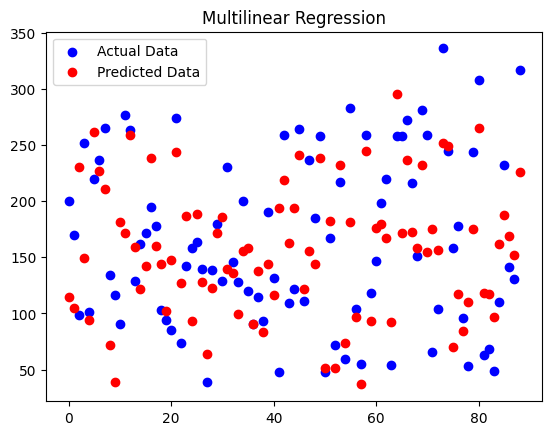

In [81]:
dummy_x = range(len(y_test))
plt.scatter(dummy_x, y_test, color='blue', label='Actual Data')
plt.scatter(dummy_x, y_pred_mlr, color='red', label='Predicted Data')
plt.title('Multilinear Regression')
plt.legend()
plt.show()

---

### Polynomial Regression with only bmi feature

In [56]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly_bmi = poly_features.fit_transform(X_train[['bmi']])

In [59]:
poly_bmi_model = LinearRegression()
poly_bmi_model.fit(x_poly_bmi, y_train)

x_poly_bmi_test = poly_features.transform(X_test[['bmi']])
y_pred_poly_bmi = poly_bmi_model.predict(x_poly_bmi_test)

poly_bmi_features = list(poly_features.get_feature_names_out())


In [86]:
w1, w2 = poly_bmi_model.coef_
b = poly_bmi_model.intercept_
print(poly_bmi_features)
print(f"w1 = {w1}, w2 = {w2}, b = {b}")

['bmi', 'bmi^2']
w1 = 10.013987594336793, w2 = 0.006909065605005171, b = -119.23545760478322


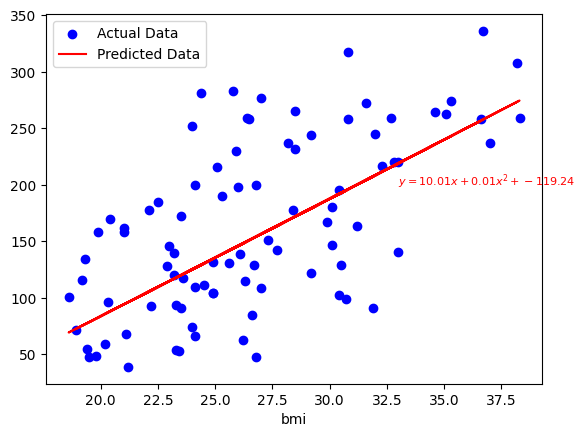

In [88]:
plt.scatter(X_test['bmi'], y_test, color='blue', label='Actual Data')
plt.plot(X_test['bmi'], y_pred_poly_bmi, color='red', label='Predicted Data')
plt.xlabel('bmi')
plt.text(33, 200, f"$y = {w1:.2f}x + {w2:.2f}x^2 + {b:.2f}$", fontsize=8, color='red')
plt.legend()

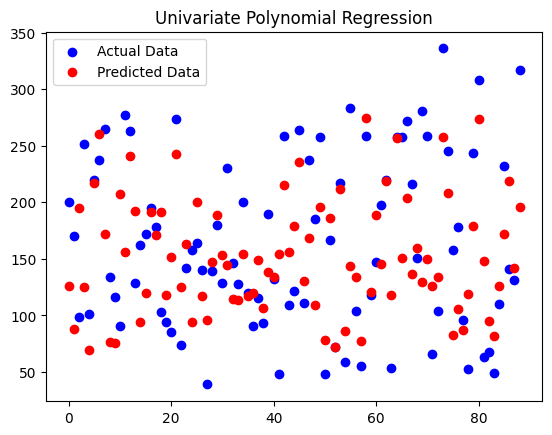

In [82]:
dummy_x = range(len(y_test))
plt.scatter(dummy_x, y_test, color='blue', label='Actual Data')
plt.scatter(dummy_x, y_pred_poly_bmi, color='red', label='Predicted Data')
plt.title('Univariate Polynomial Regression')
plt.legend()
plt.show()

---

### Polynomial Regression with all features

In [72]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly_all = poly_features.fit_transform(X_train)

In [73]:
poly_all_model = LinearRegression()
poly_all_model.fit(x_poly_all, y_train)

x_poly_all_test = poly_features.transform(X_test)
y_pred_poly_all = poly_all_model.predict(x_poly_all_test)

poly_all_features = list(poly_features.get_feature_names_out())

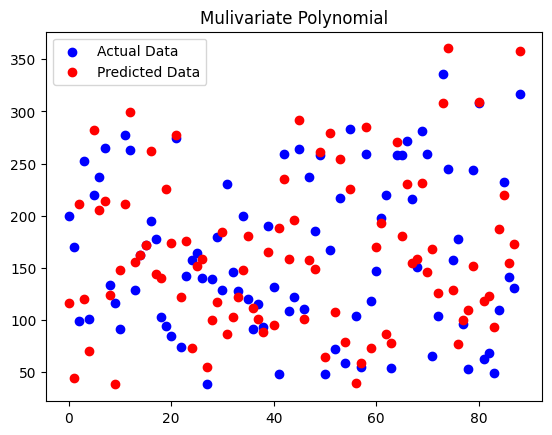

In [85]:
dummy_x = range(len(y_test))
plt.scatter(dummy_x, y_test, color='blue', label='Actual Data')
plt.scatter(dummy_x, y_pred_poly_all, color='red', label='Predicted Data')
plt.title('Mulivariate Polynomial')
plt.legend()
plt.show()

---

### Model Evaluation

In [117]:
results = {}
for mdl_name, y_pred in [
    ('Mulitivariate Linear Regression', y_pred_mlr),
    ('Univariate Polynomial', y_pred_poly_bmi),
    ('Multivariate Polynomial', y_pred_poly_all)
]:
    results[mdl_name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        f'R\u00b2': r2_score(y_test, y_pred),
    }
results_df = pd.DataFrame(results).T
display(results_df)

,MAE,MAPE,R²
Mulitivariate Linear Regression,44.322581,0.349490,0.481523
Univariate Polynomial,48.754585,0.372834,0.362048
Multivariate Polynomial,48.782360,0.381904,0.343486


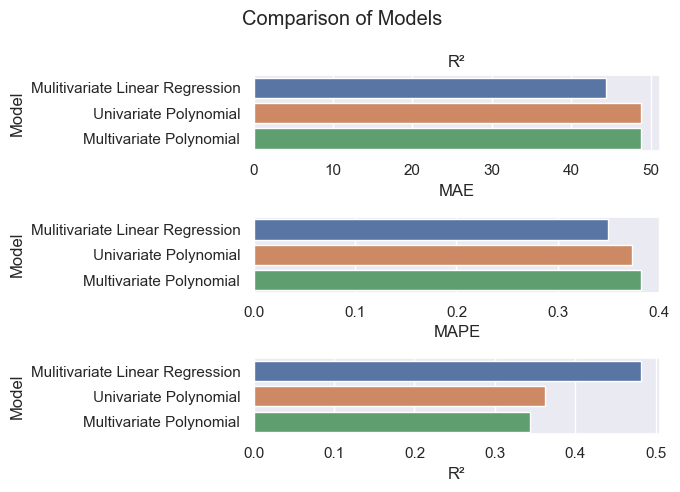

In [118]:
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)
sns.set_theme()
fig, axes = plt.subplots(3, 1, figsize=(7, 5))
sns.barplot(results_df, y='Model', x='MAE', ax=axes[0])
axes[0].set_title('Mean Absolute Error')
sns.barplot(results_df, y='Model', x='MAPE', ax=axes[1])
axes[0].set_title('Mean Absolute Percentage Error')
sns.barplot(results_df, y='Model', x='R²', ax=axes[2])
axes[0].set_title('R²')
plt.suptitle('Comparison of Models')
plt.ylabel = None
fig.tight_layout()
plt.show()

<b>Mean Absolute Error (MAE)</b>: <br>This is the average of the absolute differences
between the predicted and actual values. It's less sensitive to outliers than the
MSE. Equation: MAE = 1/n * Σ|actual - prediction| <br>
The lesser MAE the better model<br><br>
<b>Mean Absolute Percentage Error (MAPE)</b>: <br>This is the average of the
absolute percentage differences between the predicted and actual values.
Equation: MAPE = 100/n * Σ|(actual - prediction) / actual| <br>
The lesser MAPE the better model<br><br>
<b>R-squared (Coefficient of Determination)</b>: <br>This measures the proportion of
the variance in the dependent variable that is predictable from the
independent variable(s). It's a statistical measure between 0 and 1 which
calculates the goodness of fit of the regression model.<br>
The model with R-squared closer to 1 is better model

---

### Observations

#### Question 1

How many parameters are we fitting for each of the three models? Explain these values.

In [122]:
print('Number of Features used\n' + '~' * 23)
print(f'Multilinear Model: {len(mlr_features)}')
print(f'Polynomial Regression with bmi alone: {len(poly_bmi_features)}')
print(f'Polynomial Regression with all features: {len(poly_all_features)}')

Number of Features used
~~~~~~~~~~~~~~~~~~~~~~~
Multilinear Model: 10
Polynomial Regression with bmi alone: 2
Polynomial Regression with all features: 65


The linear equation for Polynomial Regression with bmi alone

In [132]:
print(
    'The linear equation for Multilinear Regression with is \n' 
    + ' + '.join([f'({w:.4f}*{x})'for x, w in zip(mlr_features, mlr_model.coef_)]) 
    + f' {mlr_model.intercept_:.4f}\n'
)
print(
    'The linear equation for Polynomial Regression with bmi alone is \n' 
    + ' + '.join([f'({w:.4f}*{x})'for x, w in zip(poly_bmi_features, poly_bmi_model.coef_)]) 
    + f' {poly_bmi_model.intercept_:.4f}\n'
)
print(
    'The linear equation for Polynomial Regression with all features is \n' 
    + ' + '.join([f'({w:.4f}*{x})'for x, w in zip(poly_all_features, poly_all_model.coef_)]) 
    + f' {poly_all_model.intercept_:.4f}\n'
)

The linear equation for Multilinear Regression with is 
(-0.0540*age) + (-25.3913*sex) + (5.8147*bmi) + (1.1640*bp) + (-0.9985*s1) + (0.7048*s2) + (0.3025*s3) + (5.6856*s4) + (68.7410*s5) + (0.1459*s6) -336.1007

The linear equation for Polynomial Regression with bmi alone is 
(10.0140*bmi) + (0.0069*bmi^2) -119.2355

The linear equation for Polynomial Regression with all features is 
(-3.8674*age) + (3.9398*sex) + (0.5710*bmi) + (-2.6692*bp) + (815.3321*s1) + (-809.0091*s2) + (-825.5278*s3) + (-156.9965*s4) + (1165.9725*s5) + (-17.8529*s6) + (0.0073*age^2) + (1.5236*age sex) + (-0.0215*age bmi) + (-0.0010*age bp) + (0.0279*age s1) + (-0.0495*age s2) + (-0.0054*age s3) + (0.3505*age s4) + (0.0339*age s5) + (0.0083*age s6) + (11.8194*sex^2) + (0.0194*sex bmi) + (0.6973*sex bp) + (2.1636*sex s1) + (-2.0158*sex s2) + (-2.3858*sex s3) + (-13.3765*sex s4) + (-51.3434*sex s5) + (0.3161*sex s6) + (0.0790*bmi^2) + (0.1628*bmi bp) + (0.1109*bmi s1) + (-0.1521*bmi s2) + (-0.0966*bmi s3) + (0.451

#### Question 2

Which model would you choose for deployment, and why?

The loss functions Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) are expected to be lower and R² is expected to be higher for a better model. 
By comparing these metrics, the Multilinear model is the better model and that can be taken to the deployment

---